## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [1]:
#Imports
import matplotlib
#import cv2 as cv
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

In [2]:
yff = np.array([[446.16396104],
       [475.18181818],
       [504.72727273],
       [540.6038961 ],
       [460.40909091],
       [426.64285714],
       [401.31818182],
       [375.99350649],
       [293.68831169],
       [314.79220779],
       [340.11688312],
       [367.55194805],
       [272.58441558],
       [249.37012987],
       [230.37662338],
       [209.27272727],
       [498.3961039 ],
       [462.51948052],
       [435.08441558],
       [367.55194805],
       [392.87662338],
       [418.2012987 ],
       [338.00649351],
       [310.57142857],
       [291.57792208],
       [209.27272727],
       [232.48701299],
       [245.14935065]])
yff = yff.reshape(1,28)

In [3]:
xff = np.array([300.58005276, 357.56057224, 427.20342938, 498.95667614,
       498.95667614, 427.20342938, 357.56057224, 296.35927354,
       292.13849432, 355.45018263, 425.09303977, 503.17745536,
       507.39823458, 425.09303977, 351.22940341, 285.80732549,
       549.60602679, 598.14498782, 631.91122159, 640.35278003,
       604.47615666, 555.93719562, 560.15797484, 608.69693588,
       650.90472808, 657.23589692, 619.24888393, 572.8203125 ])
xff = xff.reshape(1,28)

In [4]:

img_cords = np.vstack([xff,yff])

img_cords.shape

(2, 28)

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

<IPython.core.display.Javascript object>


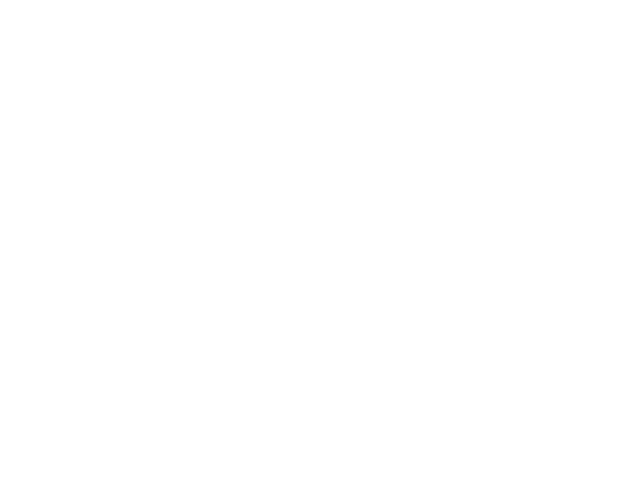

In [5]:
%matplotlib notebook
world_coords = np.array(mpimg.imread("1.jfif"))
fig = plt.figure()
ax = fig.add_subplot(111)
coords = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print (ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 60:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(world_coords)



In [6]:
marks = coords

In [7]:

coords_x = np.array([[300.58005276, 446.16396104],
       [359.67096185, 475.70941558],
       [425.09303977, 503.14448052],
       [496.84628653, 541.13149351]])
#coords_xx = np.array(coords)
xx = coords_x[0:,0]
yx = coords_x[:,1:]
coords_x

array([[300.58005276, 446.16396104],
       [359.67096185, 475.70941558],
       [425.09303977, 503.14448052],
       [496.84628653, 541.13149351]])

In [8]:
#coords1 = np.array(coords)
coords_y = np.array([[300.58005276, 446.16396104],[368.11252029, 412.39772727],
       [539.05407873, 334.31331169],
       [653.01511769, 279.44318182]])
xy = coords_y[0:,0]
yy = coords_y[:,1:]



In [9]:
coords_zz = np.array(coords)
coords_z = np.array([[300.58005276, 446.16396104],[296.35927354, 374.41071429],
       [294.24888393, 294.21590909],
       [285.80732549, 209.80032468]])
xz= coords_z[0:,0]
yz = coords_z[:,1:]


In [10]:
plt.plot(xx,yx, color='red', marker='o', linestyle='solid',linewidth=2, markersize=3)
plt.plot(xy,yy, color='red', marker='o', linestyle='solid',linewidth=2, markersize=3)
plt.plot(xz,yz, color='red', marker='o', linestyle='solid',linewidth=2, markersize=3)

<IPython.core.display.Javascript object>


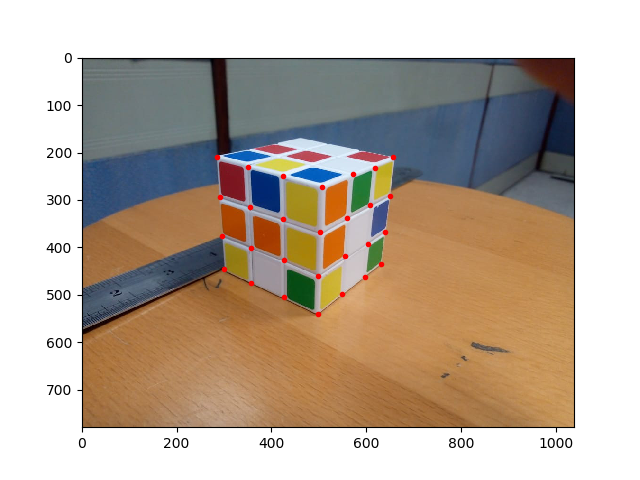

In [11]:
# Load image and do interesting stuff

%matplotlib notebook
rubiks = np.array(mpimg.imread("1.jfif"))
fig = plt.figure()
ax = fig.add_subplot(111)
coords = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print (ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 60:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.imshow(rubiks)


In [12]:
world_x = [0,1,2,3,3,2,1,0,0,1,2,3,3,2,1,0,3,3,3,3,3,3,3,3,3,3,3,3]
world_y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,2,1,1,2,3,3,2,1]
world_z = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,0,0,0,1,1,1,2,2,2,3,3,3]
world_x = np.multiply(19,world_x)
world_y = np.multiply(19,world_y)
world_z = np.multiply(19,world_z)
homo = np.ones_like(world_x)
cam_cords = np.vstack([world_x,world_y,world_z,homo])
cam_cords.shape

cam_cords_matrix = []

for i in range(world_x.shape[0]):
    t = cam_cords[:,i]
    cam_cords_matrix.append(t)
cam_cords_matrix = np.asarray(cam_cords_matrix)
cam_cords_matrix_pts = cam_cords_matrix.T

In [13]:
cam_cords_matrix_pts.shape

(4, 28)

In [14]:
img_cords_matrix = []
for i in range(img_cords.shape[1]):
    t = img_cords[:,i]
    img_cords_matrix.append(t)
img_cords_matrix = np.asarray(img_cords_matrix)
img_cords_matrix.shape


(28, 2)

In [15]:
svd_matrix = np.zeros((56,12))

svd_matrix.shape

(56, 12)

In [16]:

for i in range(0,svd_matrix.shape[0],2):
    for j in range(12):
        
        if (j <= 3):

            svd_matrix[i,j] = cam_cords_matrix[i//2,j]
        if (j > 3) and (j <= 7):

            svd_matrix[i,j] = 0
        if (j > 7) and (j <= 10):
            svd_matrix[i,j] = - (cam_cords_matrix[i//2,(j - 8)] * img_cords_matrix[i//2,0])
        if j == 11:
            svd_matrix[i,j] = -(img_cords_matrix[i//2,0])

    
        
for i in range(1,svd_matrix.shape[0],2):
    for j in range(12):
        
        if (j <= 3):
            svd_matrix[i,j] = 0
            
        if (j > 3) and (j <= 7):
             svd_matrix[i,j] = cam_cords_matrix[((i-1)//2),j-4]
              
        if (j > 7) and (j <= 10):
            svd_matrix[i,j] = - (cam_cords_matrix[((i-1)//2),(j - 8)] * img_cords_matrix[i//2,1])
        if j == 11:
            svd_matrix[i,j] = -(img_cords_matrix[((i-1)//2),1])
        
       


In [17]:
V = np.dot(svd_matrix.T,svd_matrix)
s,ev = np.linalg.eig(V)
s = np.sqrt(s)
ev = ev.T
camera_matrix = ev[-1]

In [19]:
camera_matrix = camera_matrix.reshape(3,4)

cam_mat_avg_1 = camera_matrix.copy()
estimated_2d = np.dot(camera_matrix,cam_cords_matrix_pts)
print(estimated_2d)
estimated_2d = estimated_2d[0:2,:]/estimated_2d[2,:]
x_est = estimated_2d[0]

y_est = estimated_2d[1]
camera_matrix

[[-0.55865845 -0.63487961 -0.71110077 -0.78732194 -0.75803805 -0.68181689
  -0.60559573 -0.52937456 -0.50009068 -0.57631184 -0.652533   -0.72875417
  -0.69947028 -0.62324912 -0.54702796 -0.47080679 -0.94322379 -1.09912565
  -1.2550275  -1.22574362 -1.06984176 -0.91393991 -0.88465602 -1.04055787
  -1.19645973 -1.16717584 -1.01127399 -0.85537213]
 [-0.82930061 -0.83740975 -0.8455189  -0.85362804 -0.69262506 -0.68451591
  -0.67640677 -0.66829762 -0.50729464 -0.51540378 -0.52351293 -0.53162207
  -0.37061909 -0.36250994 -0.3544008  -0.34629166 -0.85523792 -0.85684779
  -0.85845767 -0.69745469 -0.69584481 -0.69423493 -0.53323195 -0.53484183
  -0.5364517  -0.37544872 -0.37383884 -0.37222896]
 [-0.00185551 -0.00176407 -0.00167262 -0.00158117 -0.00151163 -0.00160308
  -0.00169453 -0.00178597 -0.00171643 -0.00162499 -0.00153354 -0.00144209
  -0.00137255 -0.001464   -0.00155545 -0.0016469  -0.00171391 -0.00184665
  -0.00197939 -0.00190985 -0.00177711 -0.00164437 -0.00157483 -0.00170757
  -0.00184

array([[-4.01164011e-03, -8.20536077e-03,  1.54125715e-03,
        -5.58658451e-01],
       [-4.26797034e-04, -8.47303768e-05,  8.47384129e-03,
        -8.29300609e-01],
       [ 4.81306706e-06, -6.98636963e-06,  3.65997973e-06,
        -1.85551401e-03]])

In [20]:
rubiks1 = np.array(mpimg.imread("1.jfif"))
plt.plot(xff,yff, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks1)
plt.show()

In [21]:
# Back projection part

<IPython.core.display.Javascript object>


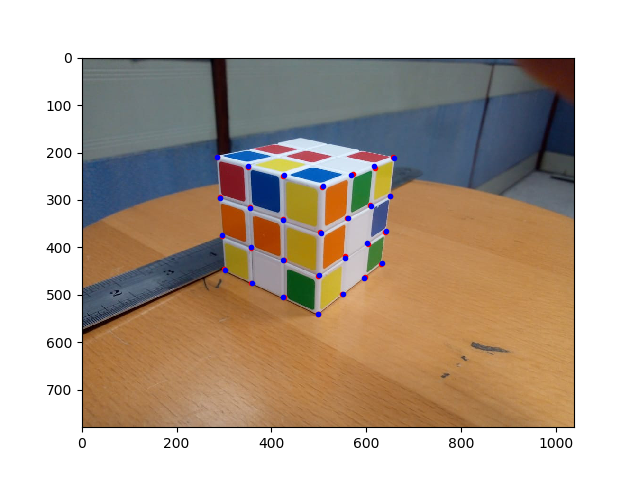

In [22]:
fig = plt.figure()
rubiks_proj = np.array(mpimg.imread("1.jfif"))
plt.plot(xff,yff, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.plot(x_est,y_est, color='blue', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks_proj)



In [176]:
rubiks_proj.shape

(780, 1040, 3)

In [23]:
# Back-projection error

total_x = xff - x_est
total_y = yff - y_est
total_x = np.abs(total_x)
total_y = np.abs(total_y)
total_error = np.sum(total_y) + np.sum(total_x)
total_error = total_error/ 28
total_error

3.094162587655725

## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

Combined since QR done using libraries.

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

In [24]:
#TODO


KR = camera_matrix[:,0:3]

R,K = np.linalg.qr(KR)


U,S,V = np.linalg.svd(camera_matrix)
V = V.T
cam_cent = V[:,-1]

cam_cent = cam_cent / cam_cent[3]
cam_cent = cam_cent
cam_cent

array([ 138.11186451, -116.13693398,  103.6609003 ,    1.        ])

In [25]:
#princ_point = K / K[2]


#princ_point = princ_point[:,2]
#princ_point
p_point = K / K[2,2]
p_point

array([[ 22.05664228,  44.65836782, -13.28046985],
       [  0.        ,  -4.28631219, -45.16654581],
       [  0.        ,   0.        ,   1.        ]])

In [26]:
p_point

array([[ 22.05664228,  44.65836782, -13.28046985],
       [  0.        ,  -4.28631219, -45.16654581],
       [  0.        ,   0.        ,   1.        ]])

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

In [27]:
size = rubiks1.shape
size

(780, 1040, 3)


 f/2.0, 1/3.1", 1.12µm
 Estimating since exact measurements for my camera not available
 
 Focal length:
x = fX/h
x = 214.14034148
X = 0


Image was taken by Moto e4 Plus
Sensor size = f/2.0, 1/3.1", 1.12µm
After conversion it becomes : 4.65 X 3.485
Image size is (780 X 1040)
Hence:
mx = 1040/3.485
my = 780/4.65

In [28]:
mx = size[1]/3.485
my = size[0]/4.65


In [29]:
p_point


array([[ 22.05664228,  44.65836782, -13.28046985],
       [  0.        ,  -4.28631219, -45.16654581],
       [  0.        ,   0.        ,   1.        ]])

In [30]:
fx =  p_point[0,0]/mx
fy =  np.abs(p_point[1,1])/my

In [31]:
fx

0.07391095993674417

In [32]:
fy

0.025553015005147638

In [33]:
principal_p = p_point[:,-1]
principal_p

plot_principal_p = principal_p[:2]
plot_principal_p
cam_ce = cam_cent
cam_ce = cam_ce.astype(np.int)
cam_cent
x_c = [cam_ce[0]]
y_c = [cam_ce[1]]
z_c = [cam_ce[2]]
cam_cent

array([ 138.11186451, -116.13693398,  103.6609003 ,    1.        ])

In [34]:
offset = p_point[:,2]
offset
offset_x = [offset[0]]
offset_y = [offset[1]]
offset_z = [offset[2]]
offset

array([-13.28046985, -45.16654581,   1.        ])

<IPython.core.display.Javascript object>


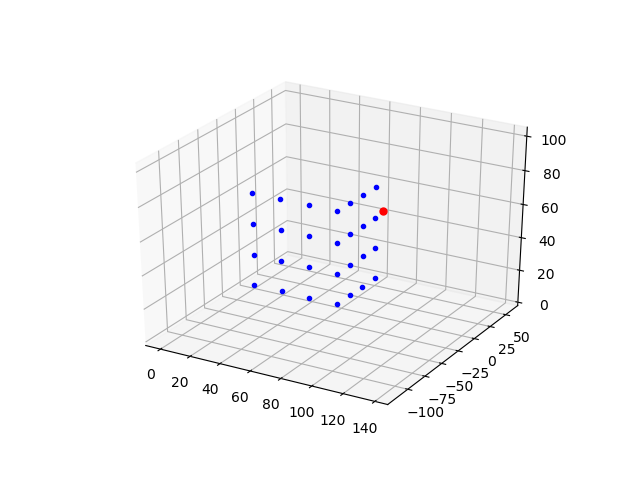

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(world_x, world_y, world_z, 'blue',linestyle='None',marker='o',markersize=3)
ax.plot3D(x_c, y_c, z_c, 'red',linestyle='None',marker='o',markersize=5)
#ax.plot3D(offset_x, offset_y, offset_z, 'orange',linestyle='None',marker='o',markersize=7)
plt.show()

In [36]:
p_p_offset = np.array(mpimg.imread("1.jfif"))

p_p_offset.shape
center_x = p_p_offset.shape[0]
center_y = p_p_offset.shape[1]
center_x = center_x // 2
center_y = center_y // 2

x_offset = center_x + offset[0]
y_offset = center_y + offset[1]

print(y_offset,center_y)



474.8334541889822 520


<IPython.core.display.Javascript object>


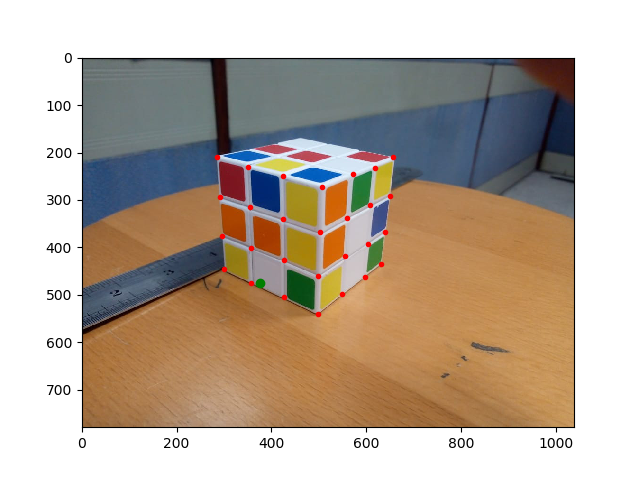

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xff,yff, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.plot(x_offset, y_offset, color='green', marker='o', linestyle='None',linewidth=2, markersize=6)

plt.imshow(p_p_offset)

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)



1 - We should use a calibration target of the right size. I suppose we should use an object that uses at least 50% of the area of the image. 


2 - To improve calibration accuracy, we could estimate parameters several times
(i.e. using different images) and average the results.

3 - To improve calibration, we should cover as many aspects of an image as we can i.e cover most of the shape by rotating camera around the object.
4 - WE should take more points.



All four techniques were implemented.

<IPython.core.display.Javascript object>


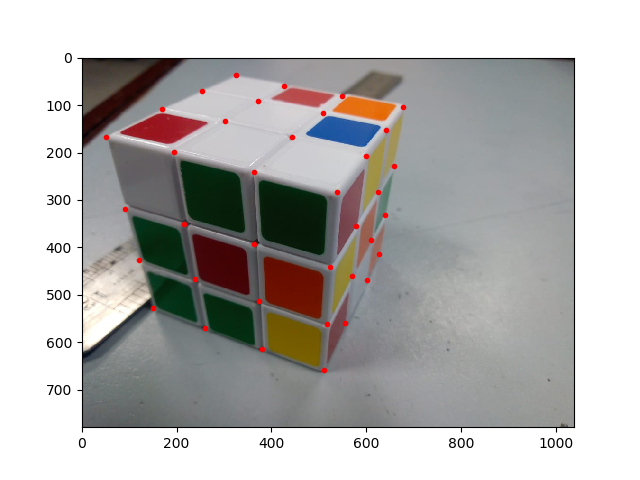

In [38]:
%matplotlib notebook
img_2 = np.array(mpimg.imread("RE.jfif"))

fig = plt.figure()
ax = fig.add_subplot(111)
coords = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print (ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 60:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.imshow(img_2)

In [264]:
x = [2,1,0,0,1,2,2,1,0]
y = [1,1,1,2,2,2,3,3,3]

In [39]:
img_2_cords = np.array(coords)
front = np.array([[149.97572545, 527.19962459],
       [259.71598519, 569.4074168 ],
       [380.00819298, 613.72559862],
       [510.85234882, 658.04378044],
       [517.18351765, 560.96585836],
       [373.67702415, 512.42689732],
       [238.61208908, 465.99832589],
       [120.4302709 , 425.9009233 ],
       [ 90.88481636, 318.27105317],
       [215.39780337, 349.92689732],
       [363.1250761 , 392.13468953],
       [523.51468649, 440.67365057],
       [538.28741376, 282.39442979],
       [363.1250761 , 240.18663758],
       [194.29390726, 197.97884537],
       [ 50.78741376, 166.32300122]])

In [40]:

side = np.array([[555.17053064, 558.85546875],
       [601.59910207, 468.1087155 ],
       [626.92377739, 413.23858563],
       [639.58611506, 330.93339083],
       [610.04066051, 383.69313109],
       [569.94325791, 459.66715706],
       [578.38481636, 354.14767654],
       [624.81338778, 282.39442979],
       [658.57962155, 227.52429992],
       [677.57312804, 103.01131291],
       [641.69650467, 151.55027394],
       [599.48871246, 206.42040381]])

In [41]:
y = side[:,1].reshape(12,1)
y

array([[558.85546875],
       [468.1087155 ],
       [413.23858563],
       [330.93339083],
       [383.69313109],
       [459.66715706],
       [354.14767654],
       [282.39442979],
       [227.52429992],
       [103.01131291],
       [151.55027394],
       [206.42040381]])

In [42]:
img2 = np.array(coords)
top = np.array([[443.31988129, 166.62801847],
       [301.92377739, 132.8617847 ],
       [168.96923194, 107.53710938],
       [253.38481636,  69.55009639],
       [371.56663454,  90.65399249],
       [508.74195921, 115.97866782],
       [548.83936181,  80.10204444],
       [426.43676441,  58.99814834],
       [325.13806311,  35.78386262]])

In [43]:
y = top[:,1].reshape(9,1)
y

array([[166.62801847],
       [132.8617847 ],
       [107.53710938],
       [ 69.55009639],
       [ 90.65399249],
       [115.97866782],
       [ 80.10204444],
       [ 58.99814834],
       [ 35.78386262]])

In [44]:
img_2_x = np.array([[149.97572545],
       [259.71598519],
       [380.00819298],
       [510.85234882],
       [517.18351765],
       [373.67702415],
       [238.61208908],
       [120.4302709 ],
       [ 90.88481636],
       [215.39780337],
       [363.1250761 ],
       [523.51468649],
       [538.28741376],
       [363.1250761 ],
       [194.29390726],
       [ 50.78741376],
       [555.17053064],
       [601.59910207],
       [626.92377739],
       [639.58611506],
       [610.04066051],
       [569.94325791],
       [578.38481636],
       [624.81338778],
       [658.57962155],
       [677.57312804],
       [641.69650467],
       [599.48871246],
       [443.31988129],
       [301.92377739],
       [168.96923194],
       [253.38481636],
       [371.56663454],
       [508.74195921],
       [548.83936181],
       [426.43676441],
       [325.13806311]
      ]).reshape(1,37)

In [45]:
img_2_y = np.array([[527.19962459],
       [569.4074168 ],
       [613.72559862],
       [658.04378044],
       [560.96585836],
       [512.42689732],
       [465.99832589],
       [425.9009233 ],
       [318.27105317],
       [349.92689732],
       [392.13468953],
       [440.67365057],
       [282.39442979],
       [240.18663758],
       [197.97884537],
       [166.32300122],
       [558.85546875],
       [468.1087155 ],
       [413.23858563],
       [330.93339083],
       [383.69313109],
       [459.66715706],
       [354.14767654],
       [282.39442979],
       [227.52429992],
       [103.01131291],
       [151.55027394],
       [206.42040381],
       [166.62801847],
       [132.8617847 ],
       [107.53710938],
       [ 69.55009639],
       [ 90.65399249],
       [115.97866782],
       [ 80.10204444],
       [ 58.99814834],
       [ 35.78386262]       
                   ]).reshape(1,37)

In [46]:
img_2_x.shape
#img_2_x = np.array(img_2_cords[:,0]).reshape(37,1)
#img_2_y = np.array(img_2_cords[:,1]).reshape(37,1)

(1, 37)

In [47]:
img_2_cords = np.vstack([img_2_x,img_2_y])
img_2_cords.shape

(2, 37)

In [48]:
world_x = [0,1,2,3,3,2,1,0,0,1,2,3,3,2,1,0,3,3,3,3,3,3,3,3,3,3,3,3,2,1,0,0,1,2,2,1,0]
world_y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,2,1,1,2,3,3,2,1,1,1,1,2,2,2,3,3,3]
world_z = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,0,0,0,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3]
world_x = np.multiply(19,world_x)
world_y = np.multiply(19,world_y)
world_z = np.multiply(19,world_z)
homo = np.ones_like(world_x)
cam_cords = np.vstack([world_x,world_y,world_z,homo])


cam_cords_matrix = []

for i in range(37):
    t = cam_cords[:,i]
    cam_cords_matrix.append(t)
cam_cords_matrix = np.asarray(cam_cords_matrix)
cam_cords_matrix_pts = cam_cords_matrix.T


In [49]:
cam_cords_matrix_pts.shape

(4, 37)

In [50]:
img_cords_matrix = []
for i in range(img_2_cords.shape[1]):
    t = img_2_cords[:,i]
    img_cords_matrix.append(t)
img_cords_matrix = np.asarray(img_cords_matrix)
img_cords_matrix.shape


(37, 2)

In [51]:
svd_matrix = np.zeros((74,12))

svd_matrix.shape

(74, 12)

In [52]:
for i in range(0,svd_matrix.shape[0],2):
    for j in range(12):
        
        if (j <= 3):

            svd_matrix[i,j] = cam_cords_matrix[i//2,j]
        if (j > 3) and (j <= 7):

            svd_matrix[i,j] = 0
        if (j > 7) and (j <= 10):
            svd_matrix[i,j] = - (cam_cords_matrix[i//2,(j - 8)] * img_cords_matrix[i//2,0])
        if j == 11:
            svd_matrix[i,j] = -(img_cords_matrix[i//2,0])

    
      
for i in range(1,svd_matrix.shape[0],2):
    for j in range(12):
        
        if (j <= 3):
            svd_matrix[i,j] = 0
            
        if (j > 3) and (j <= 7):
             svd_matrix[i,j] = cam_cords_matrix[((i-1)//2),j-4]
              
        if (j > 7) and (j <= 10):
            svd_matrix[i,j] = - (cam_cords_matrix[((i-1)//2),(j - 8)] * img_cords_matrix[i//2,1])
        if j == 11:
            svd_matrix[i,j] = -(img_cords_matrix[((i-1)//2),1])

            

In [53]:
V = np.dot(svd_matrix.T,svd_matrix)
s,ev = np.linalg.eig(V)
s = np.sqrt(s)
ev = ev.T
camera_matrix = ev[-1]

In [54]:
camera_matrix = camera_matrix.reshape(3,4)


estimated_2d = np.dot(camera_matrix,cam_cords_matrix_pts)
print(estimated_2d)
estimated_2d = estimated_2d[0:2,:]/estimated_2d[2,:]
x_est = estimated_2d[0]

y_est = estimated_2d[1]
camera_matrix

[[-2.72304707e-01 -4.57992109e-01 -6.43679510e-01 -8.29366911e-01
  -7.60157334e-01 -5.74469933e-01 -3.88782532e-01 -2.03095131e-01
  -1.33885554e-01 -3.19572955e-01 -5.05260356e-01 -6.90947757e-01
  -6.21738181e-01 -4.36050779e-01 -2.50363378e-01 -6.46759769e-02
  -1.02068010e+00 -1.21199329e+00 -1.40330648e+00 -1.33409690e+00
  -1.14278371e+00 -9.51470522e-01 -8.82260945e-01 -1.07357413e+00
  -1.26488732e+00 -1.19567774e+00 -1.00436456e+00 -8.13051369e-01
  -6.27363967e-01 -4.41676566e-01 -2.55989165e-01 -4.47302353e-01
  -6.32989754e-01 -8.18677155e-01 -1.00999034e+00 -8.24302942e-01
  -6.38615541e-01]
 [-9.62006694e-01 -9.98331762e-01 -1.03465683e+00 -1.07098190e+00
  -8.23619846e-01 -7.87294778e-01 -7.50969709e-01 -7.14644641e-01
  -4.67282588e-01 -5.03607656e-01 -5.39932725e-01 -5.76257793e-01
  -3.28895740e-01 -2.92570672e-01 -2.56245603e-01 -2.19920535e-01
  -1.02212052e+00 -9.73259132e-01 -9.24397748e-01 -6.77035695e-01
  -7.25897079e-01 -7.74758463e-01 -5.27396410e-01 -4.7853

array([[-9.77302112e-03, -1.00691152e-02,  3.64260930e-03,
        -2.72304707e-01],
       [-1.91184571e-03,  2.57165177e-03,  1.30190554e-02,
        -9.62006694e-01],
       [ 3.50512209e-06, -1.07606308e-05,  8.31100790e-06,
        -1.82623031e-03]])

In [55]:
rubiks1 = np.array(mpimg.imread("RE.jfif"))
plt.plot(img_2_x,img_2_y, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks1)
plt.show()

<IPython.core.display.Javascript object>


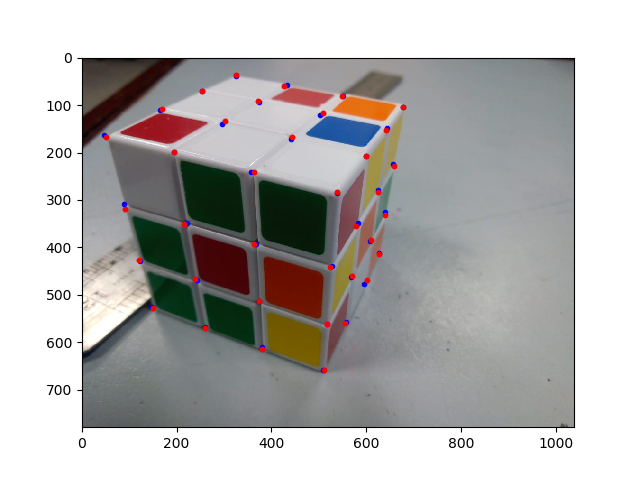

In [56]:
fig = plt.figure()
rubiks_proj = np.array(mpimg.imread("RE.jfif"))
plt.plot(img_2_x,img_2_y, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.plot(x_est,y_est, color='blue', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks_proj)



In [128]:
## Now we average out the two matrices that we get


# Error with this matrix

# Back-projection error

total_x = img_2_x - x_est
total_y = img_2_y - y_est
total_x = np.abs(total_x)
total_y = np.abs(total_y)
total_error = np.sum(total_y) + np.sum(total_x)
total_error = total_error/ 28
total_error

6.488967318003039

In [57]:
#camera_matrix = camera_matrix.reshape(3,4)
#print(cam_mat_avg_1,'\n\n\n',camera_matrix,'\n\n\n')
#print(camera_matrix)
camera_matrix = np.mean([camera_matrix,cam_mat_avg_1],axis=0)

estimated_2d = np.dot(camera_matrix,cam_cords_matrix_pts)
#print(estimated_2d)
estimated_2d = estimated_2d[0:2,:]/estimated_2d[2,:]
x_est = estimated_2d[0]

y_est = estimated_2d[1]

In [58]:
rubiks2 = np.array(mpimg.imread("RE.jfif"))
plt.plot(img_2_x,img_2_y, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks2)
plt.show()

<IPython.core.display.Javascript object>


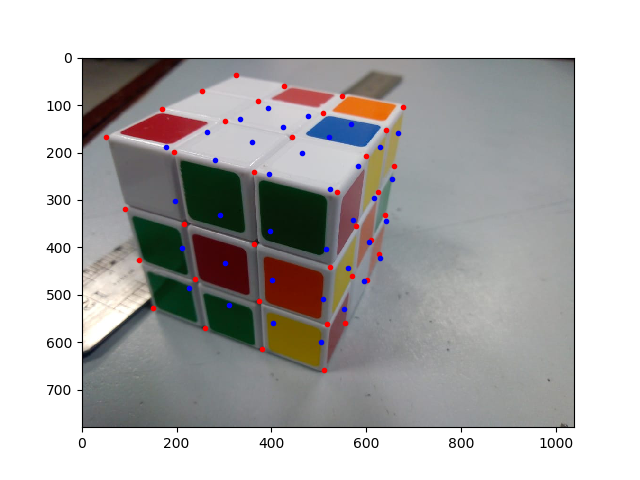

In [59]:


fig = plt.figure()
rubiks_proj = np.array(mpimg.imread("RE.jfif"))
plt.plot(img_2_x,img_2_y, color='red', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.plot(x_est,y_est, color='blue', marker='o', linestyle='None',linewidth=2, markersize=3)
plt.imshow(rubiks_proj)


In [219]:
#Error with avg_matrix

total_x = img_2_x - x_est
total_y = img_2_y - y_est
total_x = np.abs(total_x)
total_y = np.abs(total_y)
total_error = np.sum(total_y) + np.sum(total_x)
total_error = total_error/ 28
total_error

93.11276241572412

In [60]:
# WAYYY WAYYY WORSE

In [61]:
# your answer/code goes here

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

Undergrad so bonus!!

This method allows us to compute the intrinsic/extrinsic parameters directly hence is called Direct parameter calibration.
We assume that the world reference frame is known (e.g., the origin is the middle
lower corner of the calibration pattern).
We don't use any sort of projection/matrix rather estimate all the parameters directly.
We see that  The five intrinsic parameters f , s x, s y, ox, oy are not independent.
Now - We can define the following four independent parameters:
fx = f/sx, the focal length in horizontal pixels

theta = s y /s x (or theta = fx/fy)), aspect ratio
(ox, oy), image center coordinat

1) Assuming that ox and oy are known, estimate all the remaining parameter and then estimate ox and oy


• Step 1: estimate fx,theta, R, and T


x = −fx( r11Xw + r12Yw + r13Zw + Tx)/ r31Xw + r32Yw + r33Zw + Tz)

:
x*fy (r21Xw + r22Yw + r23Zw + Ty) = y fx (r11Xw + r12Yw + r13Zw + Tx)  # Same denominators

Derive a system of equations
- Each pair of corresponding points leads to an equation:

   xi*X^wi v1 + xiY^wi v2 + xiZ^wi v3 + xiv4 − yi*X*w i v5 − yiY^wi v6 − yiZ^wi v7 − yiv8 = 0
   
  N corresponding points lead to a homogeneous system of N equations with 8 unknowns:
    Av = 0 
    
    Therefore, we now do our standard SVD and find the column vector of V corresponding to the smallest eigenvalue just like we did in our linear transformation above.
    
  Using the components of v and v':
      (v1 , v2 , v3 , v4 , v5 , v6 , v7 , v8 ) = (r21,r22,r23, Ty , thetar11, thetar12, thetar13, theta1Tx )
      
    (v1^2 + v2^2 + v3^2)^0.5 = row^2(r1^21+r22^2+r23^2)^0.5 = absolute(row)
    
     (v5^2 + v6^2 + v7^2)^0.5 = theta^2*row^2(r11^2  + r12^2 +r13^2)^0.5 = absolute(row)*theta
     
     Now, we determine r21, r22, r23, r11, r12, r13, Ty , Tx
     
     
     r21 = 1/|row| v1'
    r22 = 1/|row| v2'
    r23 = 1/|row| v3'
    Ty = 1/|row| v4'
    r11 = 1/theta|row| v5'
   r12 = 1/theta|row| v6'
     r13 = 1/theta|row| v7'
       Tx = 1/theta|row| v8'
    
    Now we determine r31, r32, r33
    This can be estimated as the cross product of R1 and R2 :
    
    R3 = R1 x R2
    
    
  Determine Tz and fx
  
  x = − f/s x (r11Xw + r12Yw + r13Zw + Tx)/(r31Xw + r32Yw + r33Zw + Tz)
  
  We can obtain Tz and f x by solving a system of equations like we did in our SVD example above
  A [Tx, fx] = b
  [Tx, fx] = (A T A)^−1ATb
   Using SVD, the (least-squares) solution is:
   From fx = f/sx and fy = f/s y we have:
   fy = fx/theta
   
oy :
   • Step 2: estimate ox and oy
- The computation of ox and oy will be based on the following theorem:
Orthocenter Theorem: Let T be the triangle on the image plane defined by the three
vanishing points of three mutually orthogonal sets of parallel lines in space. The
image center (ox, oy) is the orthocenter of T.
- We can use the same calibration pattern to compute three vanishing points (use three
pairs of parallel lines defined by the sides of the planes).


    
    
 # Differences
We can see that we don't use any sort of projection/matrix rather estimate all the parameters directly using this method.

# Time and space complexity

In the first method, we needed an SVD that consisted of a minimum of 6 equations as we have 12 unknowns. In this method, we did an SVD of atleast 4 equations as we had 8 unknowns so the computational complexity is less in this step.
Then to determine Tz and f x we did another SVD. The other steps were simple additions and multiplications so get cancelled out in the constant term in the big-Oh notation.
The direct linear transformation takes slightly more time since we have to computer the Qr transform as well. If we are not interested in the extrinsic/intrinsic parameters, 

In terms of space, we can see that both algorithms have roughly the same space complexity since they store the same number of parameters.If we are not interested in the extrinsic/intrinsic parameters, we can avoid the QR decompostion part and save space (less parameters, only 12) as opposed to (5+9+2).